In [1]:
## Se importan las librerias necesarias
import os
from skimage.io import imread
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

2023-01-07 17:07:27.663864: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 17:07:28.541658: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-07 17:07:28.541768: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-07 17:07:30.937579: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
## Se establece la ruta de las imagenes
path_images = "/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images"

In [3]:
## Se establece la ruta del df_styles
path_csv = "/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/styles.csv"

In [4]:
path_csv_created = "/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/styles_modified.csv"

In [5]:
## Se crea el df_styles
df_styles = pd.read_csv(path_csv,error_bad_lines=False, nrows = 500)

In [6]:
df_styles

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
495,16153,Men,Footwear,Shoes,Formal Shoes,Black,Fall,2011,Formal,Enroute Men Leather Black Formal Shoes
496,17081,Women,Accessories,Wallets,Wallets,Blue,Winter,2015,Casual,Lino Perros Women Denim Blue Wallet
497,50746,Men,Footwear,Shoes,Formal Shoes,Black,Winter,2018,Formal,Red Chief Men Black Formal Shoes
498,34203,Men,Apparel,Bottomwear,Track Pants,Charcoal,Winter,2013,Casual,Proline Men Charcoal Grey Track Pants


In [7]:
## Se obtiene una lista de los id del df_styles (Los numeros que identifican )
list_id = list(df_styles.id)


In [8]:
## Se crea una lista vacia de imagenes
images = []

In [9]:
## Se agrega a images los nombres de los archivos + .jpg
for file in list_id:
    images.append(str(file) + ".jpg")

In [10]:
len(images)

500

In [11]:
filenames = []
for image in images:
    filenames.append((os.path.join(path_images, image)))

In [12]:
filenames 

['/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/15970.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/39386.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/59263.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/21379.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/53759.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/1855.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/30805.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/26960.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/29114.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/30039.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/9204.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/48123.jpg',
 '/home/vvdiaz1/code/vvdiaz1/automatic_tagging/raw_data/images/18653.jpg',
 '/home/vvdiaz1/code/vvdiaz

In [13]:
import os
from PIL import Image

def images_generator(filenames):
  # Loop over the filenames
  for filename in filenames:
    # Load the image
    try: 
        image = Image.open(filename)
        ## Preprocess the image 
        image = image.resize((224, 224))
        image = np.array(image) / 255.0
    except: 
        image = None

    # Yield the image
    yield image

In [14]:
# Create the generator
generator = images_generator(filenames)

In [15]:
# Get the first image
generator

<generator object images_generator at 0x7fed69aad740>

In [16]:
image = next(generator)

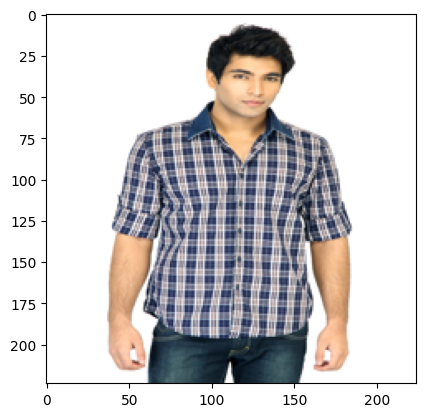

In [17]:
plt.imshow(image)

In [18]:
# Process all images
lista_vacia = []

In [19]:
for image in generator:
  # Do something with the image
    try:
        lista_vacia.append(image)
    except: 
        continue 
    

In [29]:
lista_vacia[1000]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [30]:
df_styles 

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
4995,44573,Men,Footwear,Sandal,Sandals,Brown,Summer,2012,Casual,Coolers Men Brown Sandals
4996,37081,Women,Accessories,Bags,Handbags,Brown,Summer,2012,Casual,Lino Perros Women Brown Handbag
4997,57958,Women,Apparel,Saree,Sarees,Green,Summer,2012,Ethnic,Prafful Green Printed Sari
4998,5654,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011,Sports,Reebok Men's Winning Stride White Shoe


In [31]:
df_styles["image"] = None

In [32]:
len(df_styles)

5000

In [33]:
## Para cada una de las filas de el dataset df_styles la rellenamos con la imagen correspondiente en formato matriz
for i in range(len(df_styles.id)-1):    
    df_styles["image"].loc[i] = lista_vacia[i]

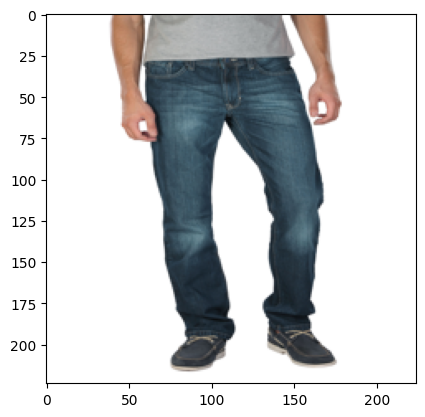

In [34]:
plt.imshow(df_styles.image[0])

In [35]:
df_styles.to_csv(path_csv_created)


In [36]:
image_data = []

In [37]:
# Dependiendo del nombre de la imagen se trae la matriz que la representa
for image in images:
    image_data.append(cv2.imread(os.path.join(path_images, image)))

: 

: 

In [ ]:
image_data

In [ ]:
## Se grafica una imagen random para saber si estamos en lo correcto
plt.imshow(image_data[1])

In [ ]:
## Se crea un Dataframe con los valores de los array 
image_df = pd.DataFrame(image_data, columns = [["Images"]])


In [ ]:
## Que tiene la siguiente forma 
image_df

In [ ]:
## Graficamos una imagen desde el DataFrame

plt.imshow(image_df.loc[1].values[0])

In [ ]:
## Graficamos otra imagen desde el Dataset
plt.imshow(image_df.loc[2].values[0])

In [ ]:
## Creamos una columna vacia de nuestro Dataset Antiguo
df_styles["image"] = None

In [ ]:
## Para cada una de las filas de el dataset df_styles la rellenamos con la imagen correspondiente en formato matriz
for i in range(len(df_styles)):    
    df_styles["image"].loc[i] = image_df.loc[i].values[0]

In [ ]:
plt.imshow(df_styles['image'].loc[1])

In [ ]:
image_data[1].shape